**Load, inspect and understand the dataset**

In [61]:
import pandas as pd

df = pd.read_csv('mobile_addiction.csv')
#df.head()
#df.info()

#drop the first column (index colummn)
df.drop(columns=['Unnamed: 0'], inplace=True)
#df.head()
#df.info()

#Getting Target Variables Ready for Preprocessing
df.rename(columns={'addicted': 'addiction_status'}, inplace=True)
df['stress_risk'] = df['stress_level'].apply(lambda x: 'yes' if x >= 6 else 'no')
df.head()

,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,addiction_status,stress_risk
0,5,29,0,0,49,0,44,5,3,35,not addicted,no
1,12,29,1,2,65,1,29,5,9,21,addicted,yes
2,8,28,2,0,57,3,28,7,5,39,addicted,no
3,12,39,2,0,69,1,28,6,8,24,addicted,yes
4,7,37,3,1,64,2,27,4,5,26,addicted,no


**Data Preprocessing**

In [62]:
#Convert Target Variables from String to Binary Integers
df['addiction_status'] = df['addiction_status'].map({'addicted': 1, 'not addicted': 0})
df['stress_risk'] = df['stress_risk'].map({'yes': 1, 'no': 0})
df.head()

#Check for missing values in the dataset
df.isnull().sum()


,0
daily_screen_time,0
app_sessions,0
social_media_usage,0
gaming_time,0
notifications,0
night_usage,0
age,0
work_study_hours,0
stress_level,0
apps_installed,0


**Visualize Relations between target variables and important features**

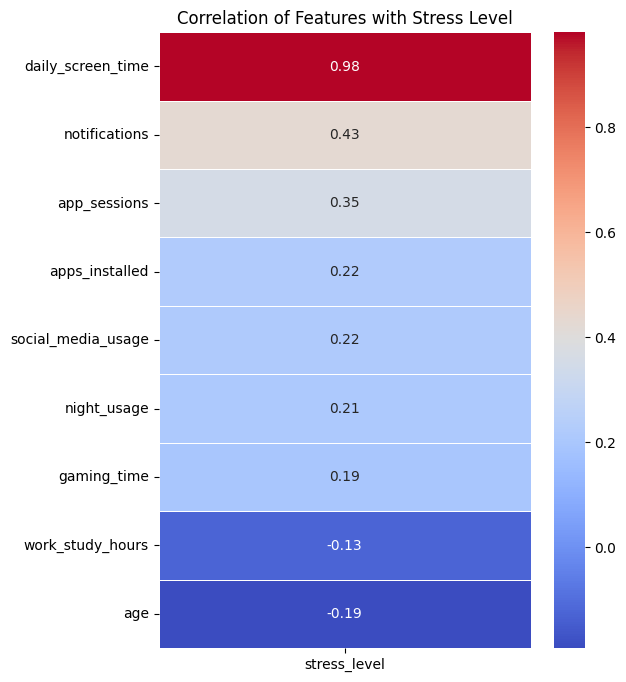

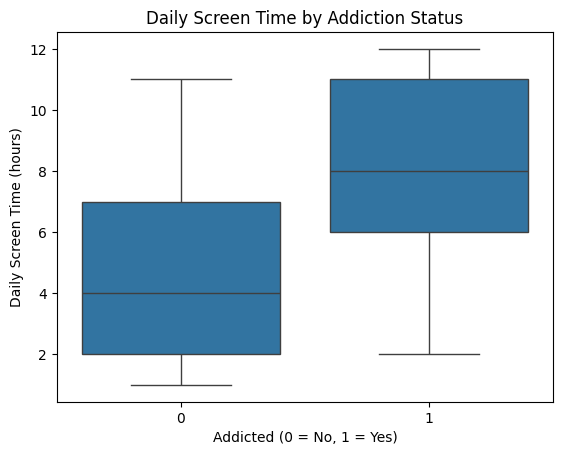

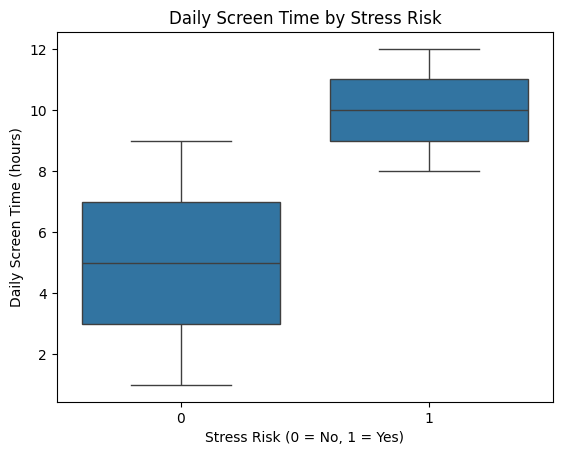

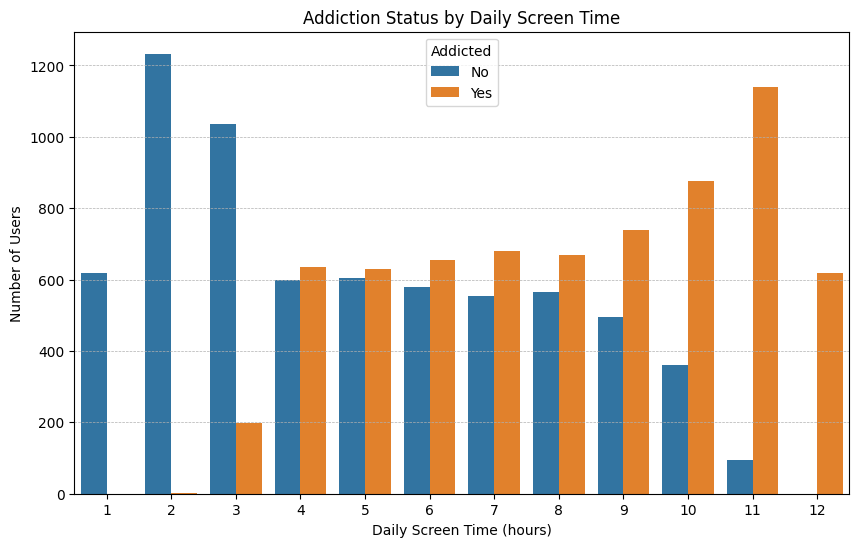

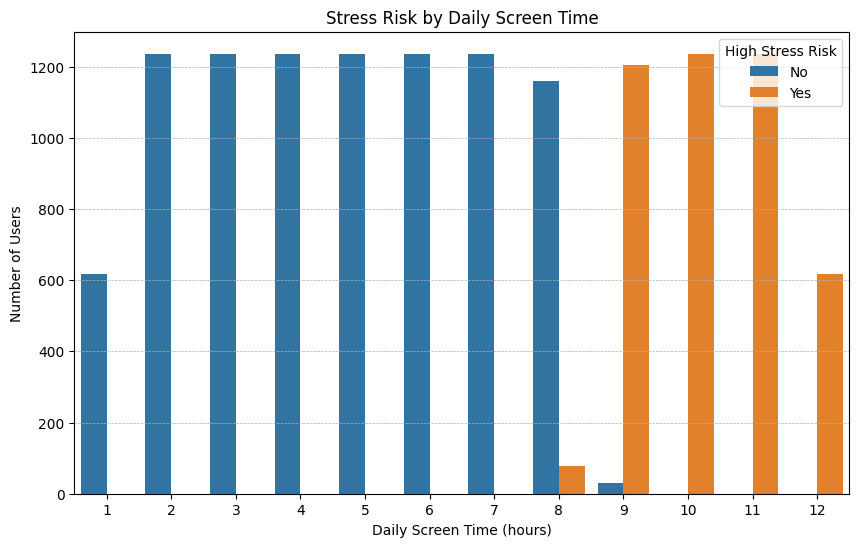

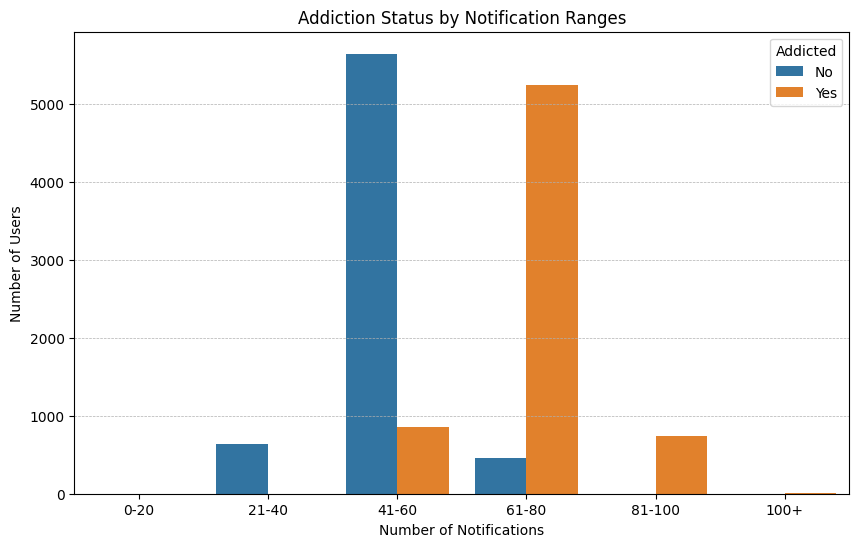

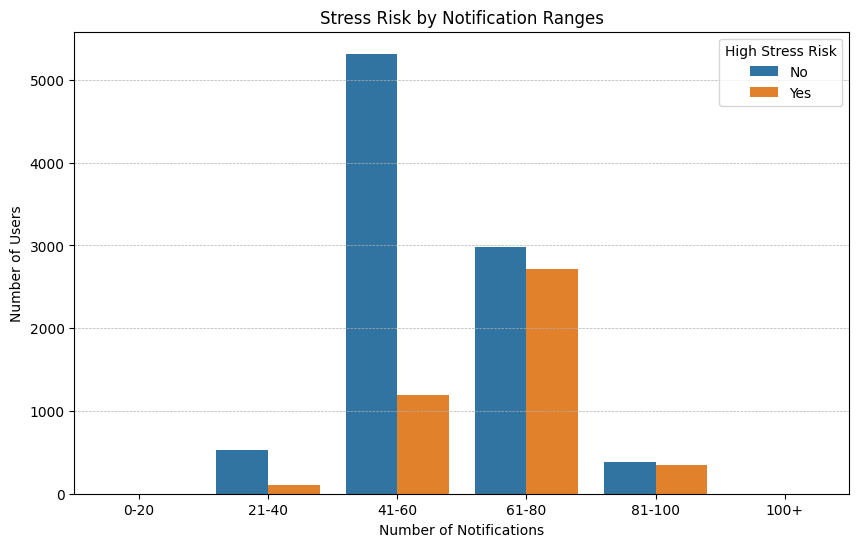

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

#Heat Map of correlation between features and stress_level
corr_with_stress = df.corr()['stress_level'].drop(['stress_level', 'stress_risk', 'addiction_status'])
corr_df = corr_with_stress.to_frame().sort_values(by='stress_level', ascending=False)
plt.figure(figsize=(6, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Features with Stress Level')
plt.show()

#Box plot to check if addicted users tend to have high screen time
sns.boxplot(x='addiction_status', y='daily_screen_time', data=df)
plt.title("Daily Screen Time by Addiction Status")
plt.xlabel("Addicted (0 = No, 1 = Yes)")
plt.ylabel("Daily Screen Time (hours)")
plt.show()

#Box plot to check if users with high stress risks tend to have high screen time
sns.boxplot(x='stress_risk', y='daily_screen_time', data=df)
plt.title("Daily Screen Time by Stress Risk")
plt.xlabel("Stress Risk (0 = No, 1 = Yes)")
plt.ylabel("Daily Screen Time (hours)")
plt.show()

#Grouped Bar Chart to visualize the counts of addicted and not addicted users
#against the number of hours in their daily screen time
df_bar = df[['daily_screen_time', 'addiction_status']].dropna()
plt.figure(figsize=(10, 6))
sns.countplot(x='daily_screen_time', hue='addiction_status', data=df_bar)
plt.title("Addiction Status by Daily Screen Time")
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Number of Users")
plt.legend(title="Addicted", labels=["No", "Yes"])
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

#Grouped Bar Chart to visualize the counts of users exposed to high Stress Risks
#against the number of hours in their daily screen time
df_bar = df[['daily_screen_time', 'stress_risk']].dropna()
plt.figure(figsize=(10, 6))
sns.countplot(x='daily_screen_time', hue='stress_risk', data=df_bar)
plt.title("Stress Risk by Daily Screen Time")
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Number of Users")
plt.legend(title="High Stress Risk", labels=["No", "Yes"])
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.show()

#Grouped HIstogram to visualize the counts of addicted and not addicted users
#against the number of notifications they receive per day
bins = [0, 20, 40, 60, 80, 100, 200]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '100+']

df_bar = df[['notifications', 'addiction_status']].dropna()
df_bar['notifications_bin'] = pd.cut(df_bar['notifications'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(10, 6))
sns.countplot(x='notifications_bin', hue='addiction_status', data=df_bar)
plt.title("Addiction Status by Notification Ranges")
plt.xlabel("Number of Notifications")
plt.ylabel("Number of Users")
plt.legend(title="Addicted", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

#Grouped Bar Chart to visualize the counts of users exposed to high Stress Risks
#against the number of notifications they receive per day
df_bar = df[['notifications', 'stress_risk']].dropna()
df_bar['notifications_bin'] = pd.cut(df_bar['notifications'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(10, 6))
sns.countplot(x='notifications_bin', hue='stress_risk', data=df_bar)
plt.title("Stress Risk by Notification Ranges")
plt.xlabel("Number of Notifications")
plt.ylabel("Number of Users")
plt.legend(title="High Stress Risk", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


**Scaling and splitting the data**

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Scaling the features
scaler = StandardScaler()

features = ['daily_screen_time', 'app_sessions', 'social_media_usage', 'gaming_time',
            'notifications', 'night_usage', 'age', 'work_study_hours', 'apps_installed']

x = df[features]
y1 = df['addiction_status']
y2 = df['stress_risk']

x_scaled = scaler.fit_transform(x)

print(x.shape, y1.shape)
print(x.shape, y2.shape)

#splitting the data
x_train, x_test, y1_train, y1_test = train_test_split(x_scaled, y1, test_size=0.2, random_state=42)
x_train, x_test, y2_train, y2_test = train_test_split(x_scaled, y2, test_size=0.2, random_state=42)


(13589, 9) (13589,)
(13589, 9) (13589,)


**Train the Logistic Regression Model to Classify if the user is Addicted or Not Addicte**

In [65]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Model for Addiction Status
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y1_train)

y1_pred = logreg_model.predict(x_test)

**Evaluate the model**

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("\nEvaluation for Logistic Regression Model:")
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))
print('-------------------')
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Precision:", precision_score(y1_test, y1_pred))
print("Recall:", recall_score(y1_test, y1_pred))
print("F1 Score:", f1_score(y1_test, y1_pred))




Evaluation for Logistic Regression Model:
Confusion Matrix:
 [[1305   31]
 [  30 1352]]
-------------------
Accuracy: 0.9775570272259014
Precision: 0.9775849602313811
Recall: 0.9782923299565847
F1 Score: 0.9779385171790235


**Visualize using ROC Curve**

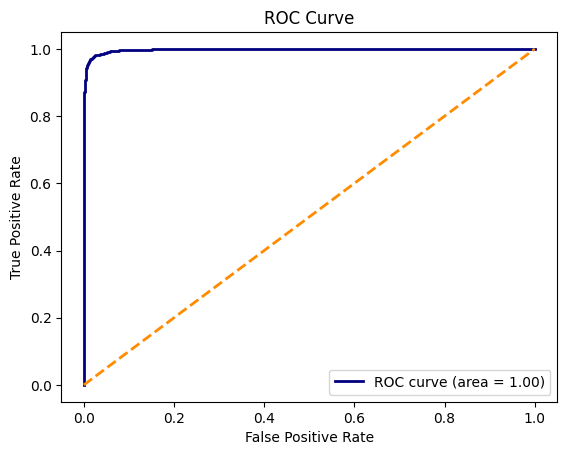

In [69]:
##plot the ROC Curve
from sklearn.metrics import roc_curve, auc

y_score = logreg_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y1_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Train the KNN Model to Classify if the user is at high stress risks or low stress risks**

In [70]:
##train the KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y2_train)

y2_pred = knn_model.predict(x_test)

**Evaluate the Model**

In [72]:
print("\nEvaluation for KNN  Model:")
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print('-------------------')
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Precision:", precision_score(y2_test, y2_pred))
print("Recall:", recall_score(y2_test, y2_pred))
print("F1 Score:", f1_score(y2_test, y2_pred))


Evaluation for KNN  Model:
Confusion Matrix:
 [[1782   65]
 [  92  779]]
-------------------
Accuracy: 0.9422369389256806
Precision: 0.9229857819905213
Recall: 0.894374282433984
F1 Score: 0.9084548104956268


**Visualize using ROC Curve**

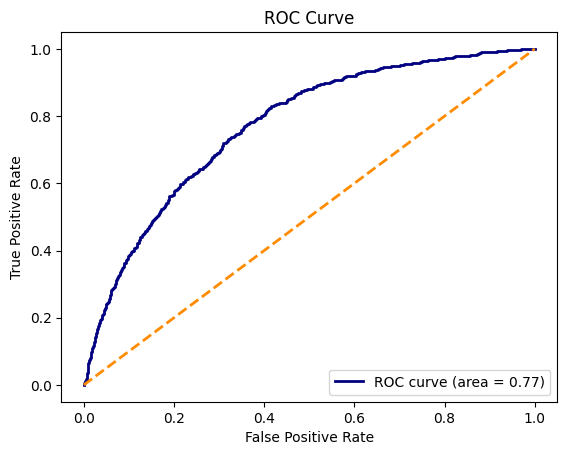

In [73]:
y_score = logreg_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y2_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()